In [23]:
import matplotlib.pyplot as plt
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output

import plotly.graph_objects as go
import seaborn as sns


olympics_data = "Resources/dropped_nulls_sorted.csv"

df = pd.read_csv(olympics_data)

In [24]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,98484,Jzef Rajnisz,M,28.0,166.0,67.0,Poland,POL,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,DNM
1,24720,Manoel Pereira da Silva,M,41.0,165.0,71.0,Portugal,POR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",DNM
2,7915,Bernd Barleben,M,20.0,183.0,79.0,Germany,GER,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Silver
3,7916,Harald Barlie,M,23.0,178.0,83.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",DNM
4,7917,Oddvar Barlie,M,31.0,176.0,79.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",DNM
5,41338,Rubn Daro Gmez Bodoya,M,20.0,160.0,57.0,Colombia,COL,1960 Summer,1960,Summer,Roma,Cycling,"Cycling Men's Road Race, Individual",DNM
6,41338,Rubn Daro Gmez Bodoya,M,20.0,160.0,57.0,Colombia,COL,1960 Summer,1960,Summer,Roma,Cycling,Cycling Men's 100 kilometres Team Time Trial,DNM
7,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Modern Pentathlon,Modern Pentathlon Men's Individual,DNM
8,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Modern Pentathlon,Modern Pentathlon Men's Team,DNM
9,70116,Kurt Evald Rolf Lindeman,M,28.0,177.0,61.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Fencing,"Fencing Men's epee, Team",DNM


In [25]:
# exploring calculating BMI to find relationship between sports and height/weight

def calculate_bmi(height_weight_df):
    weight = height_weight_df['Weight']
    height = height_weight_df['Height']
    return weight/(height * height) * 10000

bmi_df = df.apply(calculate_bmi, axis=1)







In [26]:
# make a dataframe including BMI

selected_columns = ['Height', 'Weight', 'Sport']
height_weight_df = df[selected_columns]

bmi_df2 = pd.concat([height_weight_df, bmi_df], axis=1)

bmi_df2.head(20)

,Height,Weight,Sport,0
0,166.0,67.0,Gymnastics,24.314124
1,165.0,71.0,Shooting,26.078972
2,183.0,79.0,Cycling,23.589835
3,178.0,83.0,Wrestling,26.196187
4,176.0,79.0,Wrestling,25.503616
5,160.0,57.0,Cycling,22.265625
6,160.0,57.0,Cycling,22.265625
7,177.0,61.0,Modern Pentathlon,19.470778
8,177.0,61.0,Modern Pentathlon,19.470778
9,177.0,61.0,Fencing,19.470778


In [27]:
# Renaming column

bmi_df2.rename(columns={0: 'BMI'}, inplace=True)

bmi_df2.head(10)

,Height,Weight,Sport,BMI
0,166.0,67.0,Gymnastics,24.314124
1,165.0,71.0,Shooting,26.078972
2,183.0,79.0,Cycling,23.589835
3,178.0,83.0,Wrestling,26.196187
4,176.0,79.0,Wrestling,25.503616
5,160.0,57.0,Cycling,22.265625
6,160.0,57.0,Cycling,22.265625
7,177.0,61.0,Modern Pentathlon,19.470778
8,177.0,61.0,Modern Pentathlon,19.470778
9,177.0,61.0,Fencing,19.470778


In [28]:
# make a new merged dataframe


selected_columns = ['BMI', 'Sport']

selected_sports = ['Swimming', 'Gymnastics', 'Cycling', 'Tennis', 'Rowing']

selected_df = pd.DataFrame({'Sport': selected_sports})

height_weight_df = bmi_df2[selected_columns]


merged_df = pd.merge(height_weight_df, selected_df, on='Sport', how='inner')

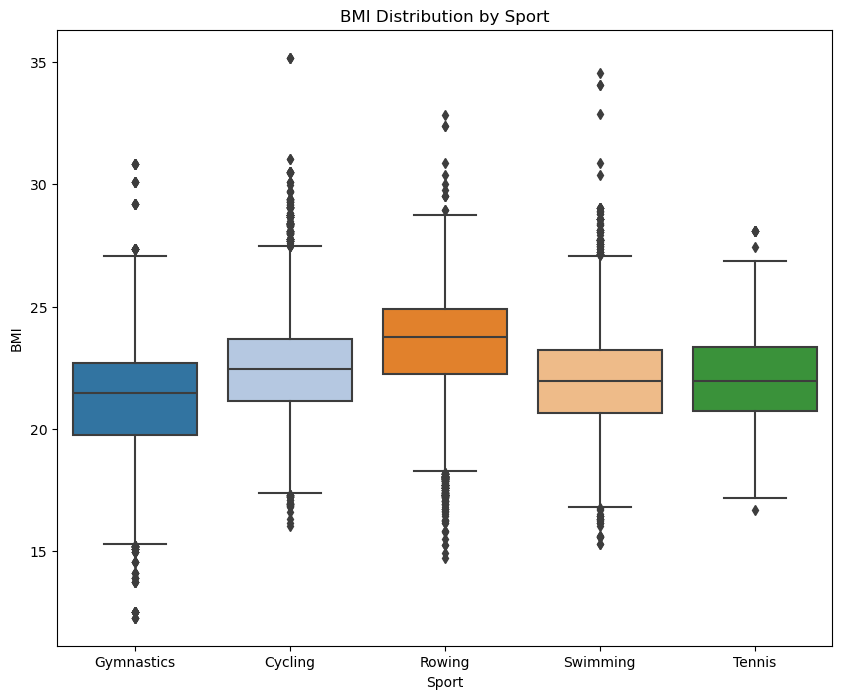

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sport', y='BMI', data=merged_df, palette='tab20')
plt.xlabel('Sport')
plt.ylabel('BMI')
plt.title('BMI Distribution by Sport')
plt.show()

In [48]:
# make a dataframe including BMI for summer and winter distribution

selected_columns = ['Season', 'Sport']
height_weight_df = df[selected_columns]

df2 = pd.concat([height_weight_df, bmi_df], axis=1)

df2.head(20)

,Season,Sport,0
0,Summer,Gymnastics,24.314124
1,Summer,Shooting,26.078972
2,Summer,Cycling,23.589835
3,Summer,Wrestling,26.196187
4,Summer,Wrestling,25.503616
5,Summer,Cycling,22.265625
6,Summer,Cycling,22.265625
7,Summer,Modern Pentathlon,19.470778
8,Summer,Modern Pentathlon,19.470778
9,Summer,Fencing,19.470778


In [49]:
df2.rename(columns={0: 'BMI'}, inplace=True)

df2.head(20)

,Season,Sport,BMI
0,Summer,Gymnastics,24.314124
1,Summer,Shooting,26.078972
2,Summer,Cycling,23.589835
3,Summer,Wrestling,26.196187
4,Summer,Wrestling,25.503616
5,Summer,Cycling,22.265625
6,Summer,Cycling,22.265625
7,Summer,Modern Pentathlon,19.470778
8,Summer,Modern Pentathlon,19.470778
9,Summer,Fencing,19.470778


In [45]:
unique_values = df['Season'].unique()
print(unique_values)


['Summer' 'Winter']


KeyError: 'BMI'

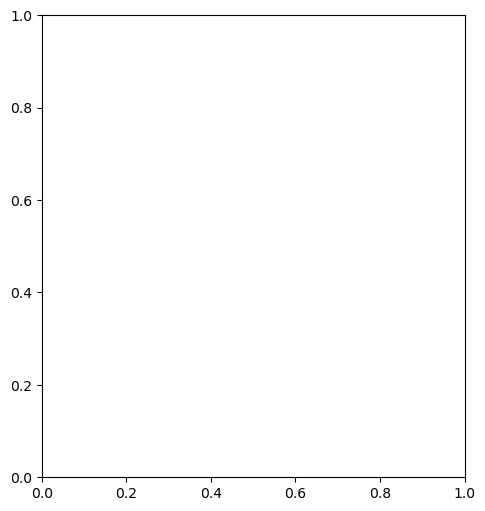

In [59]:
df2 = pd.concat([height_weight_df, bmi_df], axis=1)

# Create separate DataFrames for each season
winter_data = df2[df2['Season'] == 'Winter']
summer_data = df2[df2['Season'] == 'Summer']

# Create scatter plots for BMI vs. Weight in Winter and Summer seasons
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(winter_data['Season'], winter_data['BMI'], color='blue', alpha=0.7)
plt.title('BMI vs. Weight in Winter Season')
plt.xlabel('Weight')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
plt.scatter(summer_data['Season'], summer_data['BMI'], color='orange', alpha=0.7)
plt.title('BMI vs. Weight in Summer Season')
plt.xlabel('Weight')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()